# Import necessary depencencies

In [1]:
import pandas as pd
import numpy as np
import text_normalizer as tn
import model_evaluation_utils as meu
import nltk

np.set_printoptions(precision=2, linewidth=80)

# Load and normalize data

In [3]:
%%time
dataset = pd.read_csv('movie_reviews.csv.bz2', compression='bz2')

# take a peek at the data
print(dataset.head())
reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])
 zbn
# build train and test datasets
train_reviews = reviews[:35000]
train_sentiments = sentiments[:35000]
test_reviews = reviews[35000:]
test_sentiments = sentiments[35000:]

# normalize datasets
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('but')
stop_words.remove('not')

norm_train_reviews = tn.normalize_corpus(train_reviews, stopwords=stop_words)
norm_test_reviews = tn.normalize_corpus(test_reviews, stopwords=stop_words)

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
CPU times: user 18h 8min 50s, sys: 1h 3min 52s, total: 19h 12min 43s
Wall time: 1h 12min 6s


# Traditional Supervised Machine Learning Models

## Feature Engineering

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_reviews)
# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)

In [6]:
# transform test reviews into features
cv_test_features = cv.transform(norm_test_reviews)
tv_test_features = tv.transform(norm_test_reviews)

In [7]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (35000, 2090724)  Test features shape: (15000, 2090724)
TFIDF model:> Train features shape: (35000, 2090724)  Test features shape: (15000, 2090724)


## Model Training, Prediction and Performance Evaluation

In [8]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', max_iter=100)

In [9]:
# Logistic Regression model on BOW features
lr_bow_predictions = meu.train_predict_model(classifier=lr, 
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_bow_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.9049
Precision: 0.9049
Recall: 0.9049
F1 Score: 0.9049

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.90      0.91      0.91      7510
   negative       0.91      0.90      0.90      7490

avg / total       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6809      701
        negative        725     6765


In [10]:
# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = meu.train_predict_model(classifier=lr, 
                                               train_features=tv_train_features, train_labels=train_sentiments,
                                               test_features=tv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_tfidf_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8941
Precision: 0.8941
Recall: 0.8941
F1 Score: 0.8941

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.89      0.90      0.89      7510
   negative       0.90      0.89      0.89      7490

avg / total       0.89      0.89      0.89     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6767      743
        negative        846     6644


In [11]:
svm_bow_predictions = meu.train_predict_model(classifier=svm, 
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_bow_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.9028
Precision: 0.9028
Recall: 0.9028
F1 Score: 0.9028

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.90      0.91      0.90      7510
   negative       0.90      0.90      0.90      7490

avg / total       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6802      708
        negative        750     6740


In [12]:
svm_tfidf_predictions = meu.train_predict_model(classifier=svm, 
                                                train_features=tv_train_features, train_labels=train_sentiments,
                                                test_features=tv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_tfidf_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8963
Precision: 0.8966
Recall: 0.8963
F1 Score: 0.8962

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.89      0.91      0.90      7510
   negative       0.91      0.88      0.89      7490

avg / total       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6833      677
        negative        879     6611


# Newer Supervised Deep Learning Models

In [3]:
import gensim
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder
from keras.layers.normalization import BatchNormalization

## Prediction class label encoding

In [6]:
le = LabelEncoder()
num_classes=2 
# tokenize train reviews & encode train labels
tokenized_train = [tn.tokenizer.tokenize(text)
                   for text in norm_train_reviews]
y_tr = le.fit_transform(train_sentiments)
y_train = keras.utils.to_categorical(y_tr, num_classes)
# tokenize test reviews & encode test labels
tokenized_test = [tn.tokenizer.tokenize(text)
                   for text in norm_test_reviews]
y_ts = le.fit_transform(test_sentiments)
y_test = keras.utils.to_categorical(y_ts, num_classes)

In [7]:
# print class label encoding map and encoded labels
print('Sentiment class label map:', dict(zip(le.classes_, le.transform(le.classes_))))
print('Sample test label transformation:\n'+'-'*35,
      '\nActual Labels:', test_sentiments[:3], '\nEncoded Labels:', y_ts[:3], 
      '\nOne hot encoded Labels:\n', y_test[:3])

Sentiment class label map: {'negative': 0, 'positive': 1}
Sample test label transformation:
----------------------------------- 
Actual Labels: ['negative' 'positive' 'negative'] 
Encoded Labels: [0 1 0] 
One hot encoded Labels:
 [[1. 0.]
 [0. 1.]
 [1. 0.]]


## Feature Engineering with word embeddings

In [10]:
%%time
# build word2vec model
w2v_num_features = 512
w2v_model = gensim.models.Word2Vec(tokenized_train, size=w2v_num_features, window=150,
                                   min_count=10, sample=1e-3, workers=16)    

CPU times: user 36min 27s, sys: 598 ms, total: 36min 27s
Wall time: 2min 19s


In [13]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [14]:
# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(corpus=tokenized_train, model=w2v_model,
                                                     num_features=w2v_num_features)
avg_wv_test_features = averaged_word2vec_vectorizer(corpus=tokenized_test, model=w2v_model,
                                                    num_features=w2v_num_features)

In [15]:
# feature engineering with GloVe model
train_nlp = [tn.nlp_vec(item) for item in norm_train_reviews]
train_glove_features = np.array([item.vector for item in train_nlp])

test_nlp = [tn.nlp_vec(item) for item in norm_test_reviews]
test_glove_features = np.array([item.vector for item in test_nlp])

In [16]:
print('Word2Vec model:> Train features shape:', avg_wv_train_features.shape, ' Test features shape:', avg_wv_test_features.shape)
print('GloVe model:> Train features shape:', train_glove_features.shape, ' Test features shape:', test_glove_features.shape)

Word2Vec model:> Train features shape: (35000, 512)  Test features shape: (15000, 512)
GloVe model:> Train features shape: (35000, 300)  Test features shape: (15000, 300)


## Modeling with deep neural networks 

### Building Deep neural network architecture

In [11]:
def construct_deepnn_architecture(num_input_features):
    dnn_model = Sequential()
    dnn_model.add(Dense(512, input_shape=(num_input_features,), kernel_initializer='glorot_uniform'))
    dnn_model.add(BatchNormalization())
    dnn_model.add(Activation('relu'))
    dnn_model.add(Dropout(0.2))
    
    dnn_model.add(Dense(512, kernel_initializer='glorot_uniform'))
    dnn_model.add(BatchNormalization())
    dnn_model.add(Activation('relu'))
    dnn_model.add(Dropout(0.2))
    
    dnn_model.add(Dense(512, kernel_initializer='glorot_uniform'))
    dnn_model.add(BatchNormalization())
    dnn_model.add(Activation('relu'))
    dnn_model.add(Dropout(0.2))
    
    dnn_model.add(Dense(2))
    dnn_model.add(Activation('softmax'))

    dnn_model.compile(loss='categorical_crossentropy', optimizer='adam',                 
                      metrics=['accuracy'])
    return dnn_model

In [12]:
w2v_dnn = construct_deepnn_architecture(num_input_features=w2v_num_features)

### Visualize sample deep architecture

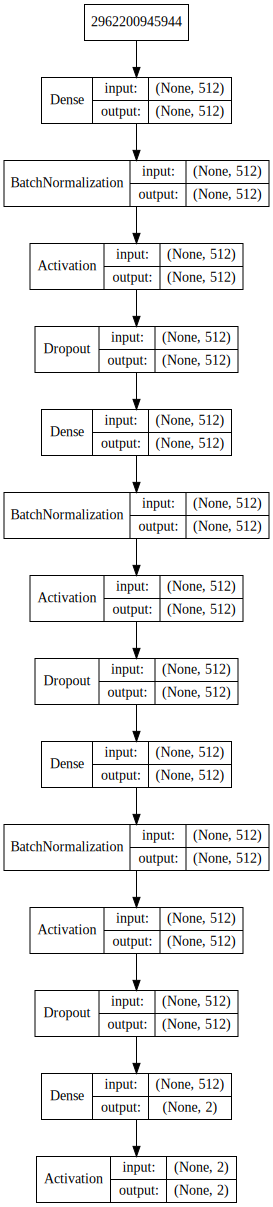

In [21]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(w2v_dnn, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

### Model Training, Prediction and Performance Evaluation

In [101]:
batch_size = 100
w2v_dnn.fit(avg_wv_train_features, y_train, epochs=10, batch_size=batch_size, 
            shuffle=True, validation_split=0.1, verbose=1)

Train on 31500 samples, validate on 3500 samples
Epoch 1/10
31500/31500 [==============================] - 8s 250us/step - loss: 0.3378 - acc: 0.8598 - val_loss: 0.3114 - val_acc: 0.8714
Epoch 2/10
31500/31500 [==============================] - 6s 204us/step - loss: 0.2877 - acc: 0.8808 - val_loss: 0.2968 - val_acc: 0.8806
Epoch 3/10
31500/31500 [==============================] - 6s 204us/step - loss: 0.2766 - acc: 0.8854 - val_loss: 0.3043 - val_acc: 0.8726
Epoch 4/10
31500/31500 [==============================] - 6s 203us/step - loss: 0.2702 - acc: 0.8888 - val_loss: 0.2964 - val_acc: 0.8786
Epoch 5/10
31500/31500 [==============================] - 6s 204us/step - loss: 0.2656 - acc: 0.8896 - val_loss: 0.3058 - val_acc: 0.8794
Epoch 6/10
31500/31500 [==============================] - 6s 204us/step - loss: 0.2618 - acc: 0.8916 - val_loss: 0.3128 - val_acc: 0.8694
Epoch 7/10
31500/31500 [==============================] - 6s 203us/step - loss: 0.2562 - acc: 0.8924 - val_loss: 0.3009 - v

In [102]:
y_pred = w2v_dnn.predict_classes(avg_wv_test_features)
predictions = le.inverse_transform(y_pred) 

/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [103]:
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predictions, 
                                      classes=['positive', 'negative'])  

Model Performance metrics:
------------------------------
Accuracy: 0.8817
Precision: 0.8818
Recall: 0.8817
F1 Score: 0.8817

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.87      0.89      0.88      7510
   negative       0.89      0.87      0.88      7490

avg / total       0.88      0.88      0.88     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6704      806
        negative        969     6521


In [106]:
glove_dnn = construct_deepnn_architecture(num_input_features=300)

In [107]:
batch_size = 100
glove_dnn.fit(train_glove_features, y_train, epochs=10, batch_size=batch_size, 
              shuffle=True, validation_split=0.1, verbose=1)

Train on 31500 samples, validate on 3500 samples
Epoch 1/10
31500/31500 [==============================] - 8s 246us/step - loss: 0.4116 - acc: 0.8204 - val_loss: 0.4466 - val_acc: 0.8066
Epoch 2/10
31500/31500 [==============================] - 6s 194us/step - loss: 0.3348 - acc: 0.8547 - val_loss: 0.3553 - val_acc: 0.8449
Epoch 3/10
31500/31500 [==============================] - 6s 193us/step - loss: 0.3134 - acc: 0.8643 - val_loss: 0.3433 - val_acc: 0.8489
Epoch 4/10
31500/31500 [==============================] - 6s 195us/step - loss: 0.2973 - acc: 0.8714 - val_loss: 0.3539 - val_acc: 0.8474
Epoch 5/10
31500/31500 [==============================] - 6s 195us/step - loss: 0.2863 - acc: 0.8791 - val_loss: 0.3429 - val_acc: 0.8480
Epoch 6/10
31500/31500 [==============================] - 6s 195us/step - loss: 0.2746 - acc: 0.8850 - val_loss: 0.3737 - val_acc: 0.8477
Epoch 7/10
31500/31500 [==============================] - 6s 196us/step - loss: 0.2611 - acc: 0.8889 - val_loss: 0.3854 - v

In [108]:
y_pred = glove_dnn.predict_classes(test_glove_features)
predictions = le.inverse_transform(y_pred) 

/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [109]:
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predictions, 
                                      classes=['positive', 'negative'])  

Model Performance metrics:
------------------------------
Accuracy: 0.8596
Precision: 0.8596
Recall: 0.8596
F1 Score: 0.8596

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.86      0.86      0.86      7510
   negative       0.86      0.85      0.86      7490

avg / total       0.86      0.86      0.86     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6496     1014
        negative       1092     6398
